In [70]:
import array
import random

import numpy
import seaborn as sns

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt 

In [74]:
ONE_MAX_LENGTH = 100
TOURNAMENT_SIZE = 3

del creator.FitnessMax
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

del creator.Individual
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/ONE_MAX_LENGTH)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)



In [75]:
# extract statistics:
def showGraph(log_):

    maxFitnessValues, meanFitnessValues = log_.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()

99.0


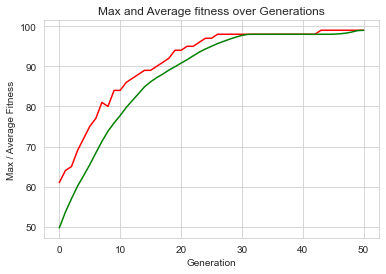

In [76]:
random.seed(42)

POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.01  # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10

pop = toolbox.population(n=POPULATION_SIZE)
hof = tools.HallOfFame(10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, 
                                stats=stats, halloffame=hof, verbose=False)

print(hof.items[0].fitness.values[0])

showGraph(log)
